# K-Means
(undirected learning technique)

first bit pulled from [my snippet](https://github.com/TheGrimmScientist/Snippets/blob/master/OutlierDetectionWithClustering/OutlierDetectionWithClustering.ipynb)

In [2]:
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [3]:
# generate data
from sklearn.datasets.samples_generator import make_blobs
data = make_blobs(n_samples=100, n_features=2, centers=3,cluster_std=2.5)[0]

In [4]:
# compute centers
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(data)
[center_1, center_2, center_3] = km.cluster_centers_

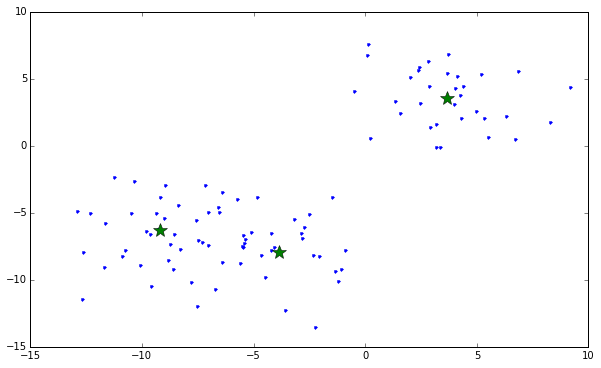

In [5]:
figure(1,figsize=(10,6))
plot([row[0] for row in data],[row[1] for row in data],'b.')
plot(center_1[0],center_1[1], 'g*',ms=15)
plot(center_2[0],center_2[1], 'g*',ms=15)
plot(center_3[0],center_3[1], 'g*',ms=15)

## Now let's look under the hood

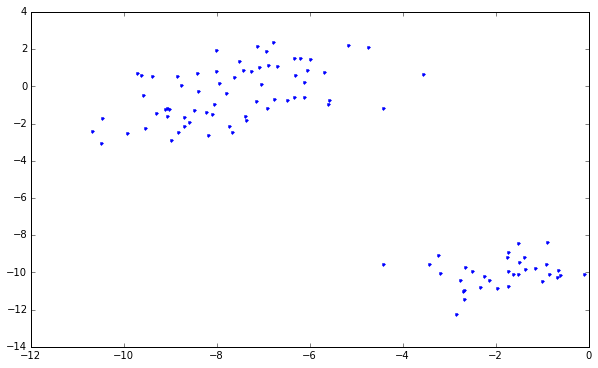

In [175]:
#re-init things
data = make_blobs(n_samples=100, n_features=2, centers=3,cluster_std=1)[0]
km = KMeans(n_clusters=3, max_iter=1, init='random')
figure(2,figsize=(10,6))
plot([row[0] for row in data],[row[1] for row in data],'b.')


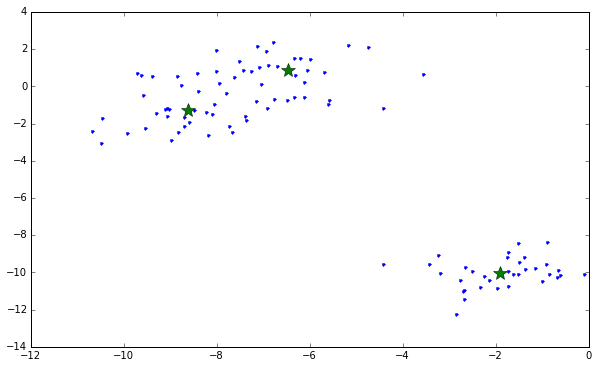

In [200]:
# ctrl-enter on this one to keep re-running it to watch the centers move around
km.fit(data)
[center_1, center_2, center_3] = km.cluster_centers_

figure(3,figsize=(10,6))
plot([row[0] for row in data],[row[1] for row in data],'b.')

plot(center_1[0],center_1[1], 'g*',ms=15)
plot(center_2[0],center_2[1], 'g*',ms=15)
plot(center_3[0],center_3[1], 'g*',ms=15)

# Scree plot
(well, something like it)

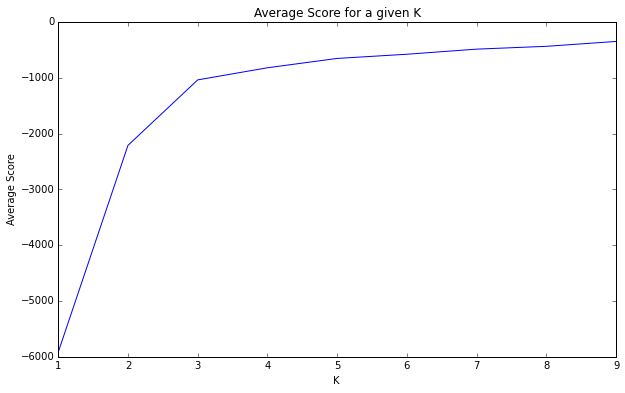

In [172]:
X = []
Y = []
for n_clusters in range(1,10):
    X.append(n_clusters)
    n_repeats = 10
    y = 0.
    for i in range(n_repeats):
        data = make_blobs(n_samples=100, n_features=2, centers=3,cluster_std=2.5)[0]
        km = KMeans(n_clusters=n_clusters)
        km.fit(data)
        score = km.score(data)
        y += score
    Y.append(y/n_repeats)

figure(4,figsize=(10,6))
plot(X,Y)
title('Average Score for a given K')
xlabel('K')
ylabel('Average Score')

fyi:  mini-batch k-means is better at scale.